In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


data\narendramodi_tweets.csv


In [49]:
tweets = pd.read_csv('data/narendramodi_tweets.csv')
tweets.shape

(3220, 14)

In [50]:
tweets.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [51]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'], format='%Y-%m-%d %H:%M:%S')
tweets['created_at'].describe()

<ipython-input-51-1218879094f6>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tweets['created_at'].describe()


count                    3220
unique                   3220
top       2016-05-26 16:46:55
freq                        1
first     2016-03-09 12:22:10
last      2017-01-31 11:00:07
Name: created_at, dtype: object

In [52]:
docs = tweets['text']

In [53]:
docs

0       The President's address wonderfully encapsulat...
1       Rashtrapati Ji's address to both Houses of Par...
2       RT @PMOIndia: Empowering the marginalised. htt...
3       RT @PMOIndia: Commitment to welfare of farmers...
4       RT @PMOIndia: Improving the quality of life fo...
                              ...                        
3215    Passage of Real Estate Bill is great news for ...
3216    RT @dpradhanbjp: Highlights of Pradhan Mantri ...
3217    Successful launch of IRNSS-1F is an accomplish...
3218    On CISF's Raising Day, I salute all CISF perso...
3219    सफ़र में धूप तो होगी जो चल सको तो चलो... निदा ...
Name: text, Length: 3220, dtype: object

In [54]:
docs = tweets['text'].str.lower()
docs

0       the president's address wonderfully encapsulat...
1       rashtrapati ji's address to both houses of par...
2       rt @pmoindia: empowering the marginalised. htt...
3       rt @pmoindia: commitment to welfare of farmers...
4       rt @pmoindia: improving the quality of life fo...
                              ...                        
3215    passage of real estate bill is great news for ...
3216    rt @dpradhanbjp: highlights of pradhan mantri ...
3217    successful launch of irnss-1f is an accomplish...
3218    on cisf's raising day, i salute all cisf perso...
3219    सफ़र में धूप तो होगी जो चल सको तो चलो... निदा ...
Name: text, Length: 3220, dtype: object

In [55]:
# removing all the other characters
docs = docs.str.replace('[^a-z\s#@]', '')
docs

<ipython-input-55-e5673c104e5c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  docs = docs.str.replace('[^a-z\s#@]', '')


0       the presidents address wonderfully encapsulate...
1       rashtrapati jis address to both houses of parl...
2       rt @pmoindia empowering the marginalised https...
3       rt @pmoindia commitment to welfare of farmers ...
4       rt @pmoindia improving the quality of life for...
                              ...                        
3215    passage of real estate bill is great news for ...
3216    rt @dpradhanbjp highlights of pradhan mantri u...
3217    successful launch of irnssf is an accomplishme...
3218    on cisfs raising day i salute all cisf personn...
3219                                \r\nhttpstcooyscfulth
Name: text, Length: 3220, dtype: object

In [56]:
docs_words = docs.str.split(' ')
docs_words

0       [the, presidents, address, wonderfully, encaps...
1       [rashtrapati, jis, address, to, both, houses, ...
2       [rt, @pmoindia, empowering, the, marginalised,...
3       [rt, @pmoindia, commitment, to, welfare, of, f...
4       [rt, @pmoindia, improving, the, quality, of, l...
                              ...                        
3215    [passage, of, real, estate, bill, is, great, n...
3216    [rt, @dpradhanbjp, highlights, of, pradhan, ma...
3217    [successful, launch, of, irnssf, is, an, accom...
3218    [on, cisfs, raising, day, i, salute, all, cisf...
3219    [, , , , , , , , , , , , , , , , , , , \r\nhtt...
Name: text, Length: 3220, dtype: object

In [57]:
words_all = []
for doc in docs_words:
    words_all.extend(doc)
    
words_all

['the',
 'presidents',
 'address',
 'wonderfully',
 'encapsulated',
 'indias',
 'strengths',
 'aspirations',
 'potential',
 'amp',
 'the',
 'efforts',
 'towards',
 '#transformingindia',
 'rashtrapati',
 'jis',
 'address',
 'to',
 'both',
 'houses',
 'of',
 'parliament',
 'was',
 'indepth',
 'amp',
 'extensive',
 'do',
 'hear',
 'httpstcordkqtjgnnx',
 '@rashtrapatibhvn',
 'rt',
 '@pmoindia',
 'empowering',
 'the',
 'marginalised',
 'httpstcowwsqgwdk',
 'rt',
 '@pmoindia',
 'commitment',
 'to',
 'welfare',
 'of',
 'farmers',
 'httpstcopaafrfmrc',
 'rt',
 '@pmoindia',
 'improving',
 'the',
 'quality',
 'of',
 'life',
 'for',
 'the',
 'poor',
 'httpstcougmvkz',
 'rt',
 '@pmoindia',
 'financial',
 'inclusion',
 'for',
 'poverty',
 'alleviation',
 'httpstcoxtzyhhte',
 'rt',
 '@rashtrapatibhvn',
 'the',
 'fourdecade',
 'old',
 'demand',
 'of',
 'onerankonepension',
 'orop',
 'of',
 'our',
 'armed',
 'forces',
 'veterans',
 'has',
 'been',
 'fulfilled',
 '#presidentmu',
 'rt',
 '@rashtrapatibh

In [58]:
words_freq = pd.Series(words_all).value_counts()
words_freq.head(50)

                 4760
the              2185
to               1517
of               1509
amp              1480
in               1038
a                 875
for               654
on                649
rt                573
with              501
is                474
our               440
and               403
will              397
i                 385
india             366
my                353
at                323
this              269
his               265
you               231
are               230
all               226
we                213
from              207
people            204
that              190
by                178
pm                166
was               153
be                152
who               151
very              145
their             144
have              144
@pmoindia         144
us                143
it                138
has               137
today             135
about             129
ties              127
an                123
@narendramodi     122
wishes    

In [59]:
import nltk

In [60]:
common_stopwords = nltk.corpus.stopwords.words('english')

In [61]:
common_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [62]:
len(common_stopwords)

179

In [63]:
custom_stopwords = ['amp', 'rt', '']
all_stopwords = common_stopwords + custom_stopwords
all_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [64]:
# Converting the series to dataframe
df_words_freq = words_freq.reset_index().rename(columns={'index': 'token', 0: 'freq'})
df_words_freq

,token,freq
0,,4760
1,the,2185
2,to,1517
3,of,1509
4,amp,1480
...,...,...
9003,httpstcotagrutzjwf,1
9004,famed,1
9005,reclamation,1
9006,gaikwad,1


In [65]:
# Remove only the stop words
df_words_freq = df_words_freq[~df_words_freq['token'].isin(all_stopwords)].reset_index(drop=True)
df_words_freq

,token,freq
0,india,366
1,people,204
2,pm,166
3,@pmoindia,144
4,us,143
...,...,...
8874,leprosy,1
8875,httpstcotagrutzjwf,1
8876,famed,1
8877,reclamation,1


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='token'>

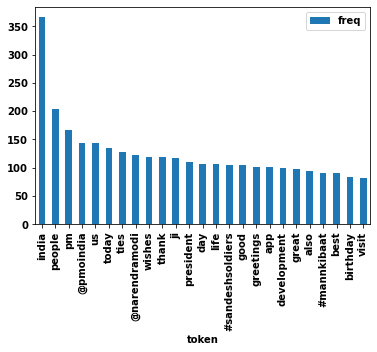

In [67]:
df_words_freq.head(25).plot.bar(x='token', y='freq')

<AxesSubplot:ylabel='token'>

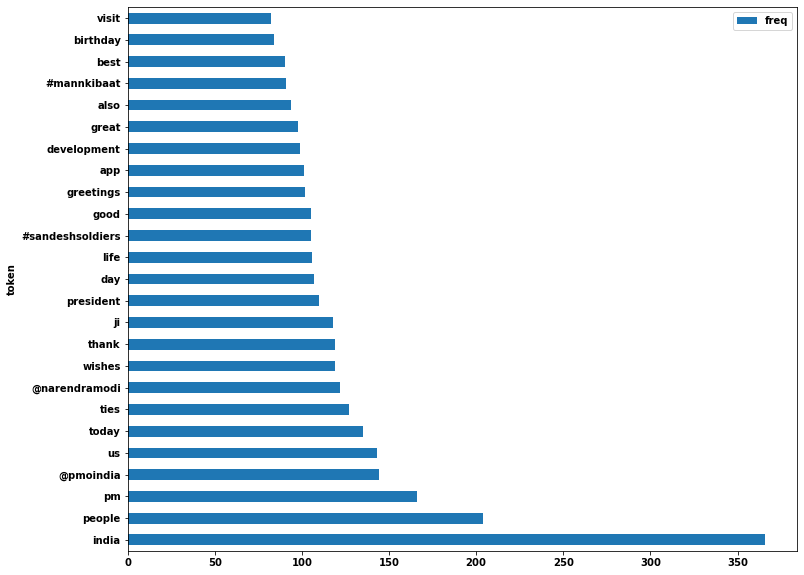

In [68]:
df_words_freq.head(25).plot.barh(x='token', y='freq', figsize=(12,10))

In [34]:
from wordcloud import WordCloud

In [46]:
sample_docs = ['today is yoga day', 'today i wish him a very happy birthday']
sample_docs_str = ' '.join(docs)
sample_docs_str

'today is yoga day today i wish him a very happy birthday'

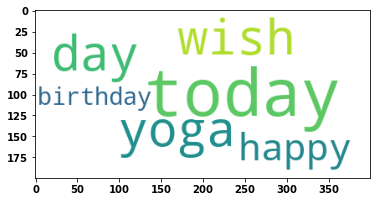

In [47]:
wc = WordCloud(background_color='white').generate(sample_docs_str)
plt.imshow(wc)

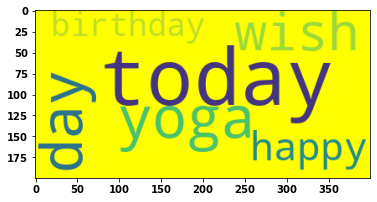

In [48]:
wc = WordCloud(background_color='yellow', stopwords=all_stopwords).generate(sample_docs_str)
plt.imshow(wc)

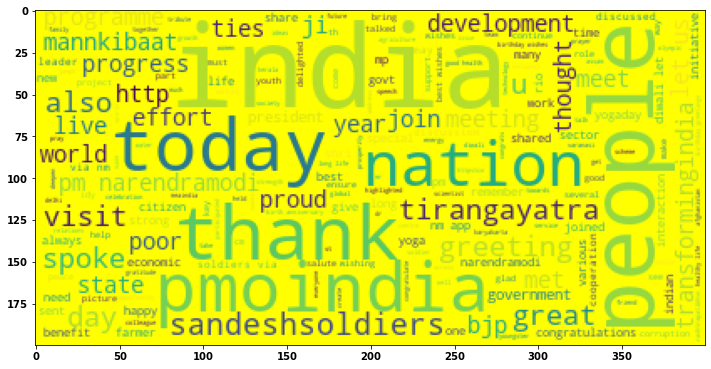

In [69]:
docs_str = ' '.join(docs)
wc = WordCloud(background_color='yellow', stopwords=all_stopwords).generate(docs_str)
plt.figure(figsize=(12, 9))
plt.imshow(wc)

## Hashtag analysis

<AxesSubplot:ylabel='token'>

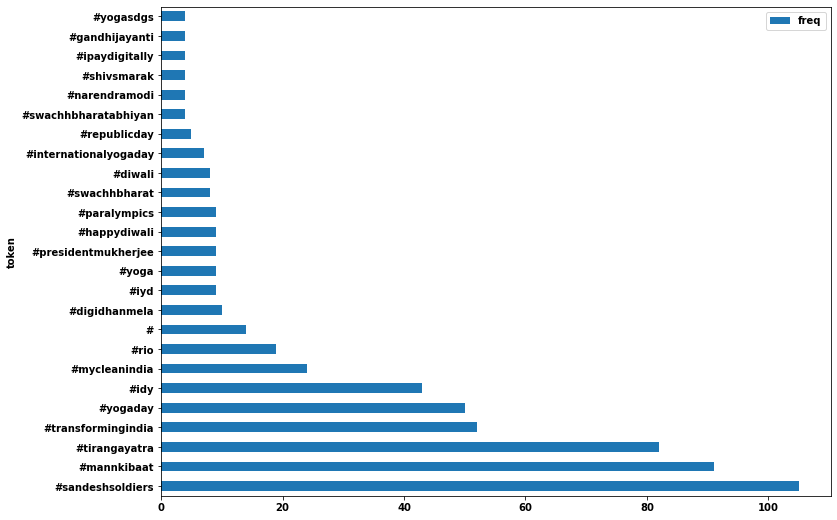

In [71]:
hashtags = df_words_freq[df_words_freq['token'].str.startswith('#')]
hashtags.head(25).plot.barh(x='token', y='freq', figsize=(12, 9))

In [74]:
# Finding the analysis of hashtags
hashtag = 'sandeshsoldiers'
tweets['docs'] = docs
tweets['hashtag'] = tweets['docs'].str.contains(hashtag)
tweets['hashtag'] = tweets['hashtag'].apply(lambda v: 1 if v == True else 0)
tweets['hashtag']

0       0
1       0
2       0
3       0
4       0
       ..
3215    0
3216    0
3217    0
3218    0
3219    0
Name: hashtag, Length: 3220, dtype: int64

In [75]:
tweets['year_month'] = tweets['created_at'].dt.strftime('%Y_%m')
tweets['year_month']

0       2017_01
1       2017_01
2       2017_01
3       2017_01
4       2017_01
         ...   
3215    2016_03
3216    2016_03
3217    2016_03
3218    2016_03
3219    2016_03
Name: year_month, Length: 3220, dtype: object

<AxesSubplot:xlabel='year_month'>

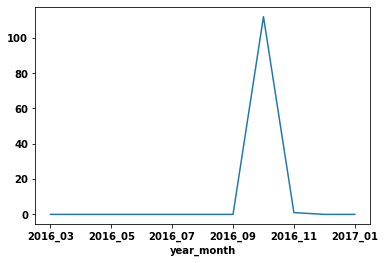

In [76]:
tweets.groupby('year_month')['hashtag'].sum().plot.line()

In [ ]:
### Optional excercises

# monthwise plot wordcloud
